In [4]:
# Questions that we will answer.

# 1 - What is the distribution of gender among employees?
# 2 - What are the mean values for age, tenure at the company, performance score, salary, weekly work hours, number of projects handled, and team size?
# 3 - How many employees are categorized by job title and department?
# 4 - What are the overall hiring trends over the years?
# 5 - What is the distribution of education levels among employees?
# 6 - How do education levels differ across departments?
# 7 - Is there a relation between education level and salary?
# 8 - Which department has the highest average work hours and number of projects handled? Is there a correlation between work hours, number of projects handled, and overtime hours?
# 9 - Is there a relation between remote work and the number of projects handled?
# 10 - Is there a relation between the number of projects handled and promotions received?
# 11 - How does employee satisfaction vary across gender and departments?
# 12 - Is there a relation between training hours, performance scores, and promotions?
# 13 - Is there a lower satisfaction score among employees who work more overtime?
# 14 - Is there a lower satisfaction score among monthly salary?

Text(0, 0.5, '')

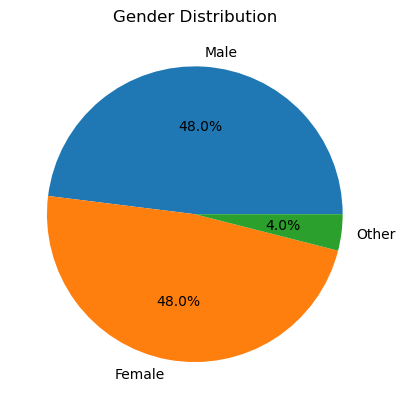

In [5]:
# 1 - What is the distribution of gender among employees?
df_gender = df['Gender'].value_counts().to_frame()

plt.pie(df_gender['count'], labels=df_gender.index, autopct='%1.1f%%')

plt.title('Gender Distribution')
plt.xlabel('')
plt.ylabel('')

# Male - Female distribution is equal.

In [6]:
# 2 - What are the mean values for age, tenure at the company, performance score, salary, weekly work hours, number of projects handled, and team size?
median = df.median(numeric_only=True)
median

Employee_ID                    50000.5
Age                               41.0
Years_At_Company                   4.0
Performance_Score                  3.0
Monthly_Salary                  6500.0
Work_Hours_Per_Week               45.0
Projects_Handled                  24.0
Overtime_Hours                    15.0
Sick_Days                          7.0
Remote_Work_Frequency             50.0
Team_Size                         10.0
Training_Hours                    49.0
Promotions                         1.0
Employee_Satisfaction_Score        3.0
Resigned                           0.0
Hire_Year                       2019.0
Hire_Month                         7.0
dtype: float64

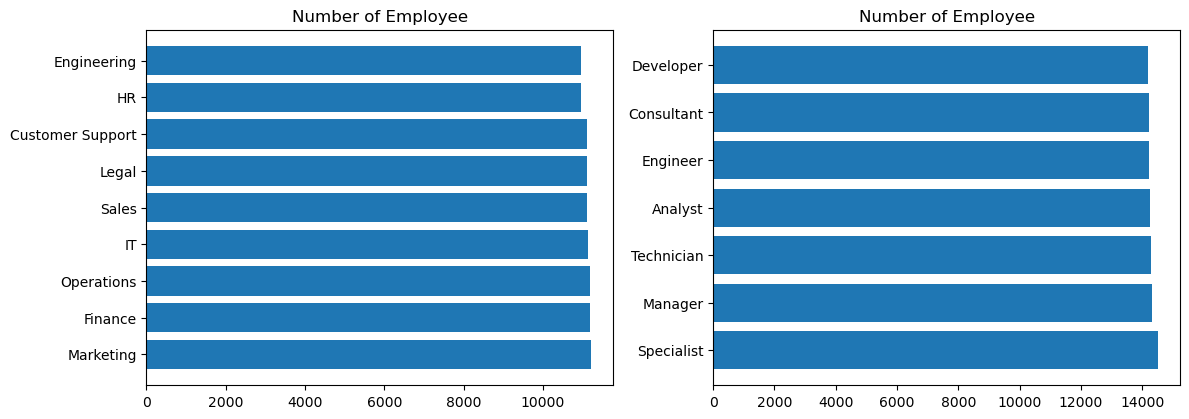

In [7]:
# 3 - How many employees are categorized by job title and department?
df_dep = df['Department'].value_counts().reset_index()
df_tit = df['Job_Title'].value_counts().reset_index()

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.barh(df_dep['Department'], df_dep['count'])
plt.title('Number of Employee')

plt.subplot(2,2,2)
plt.barh(df_tit['Job_Title'], df_tit['count'])
plt.title('Number of Employee')

plt.tight_layout()

# Employee number of department - job title is highly identical

Text(0.5, 0, 'year')

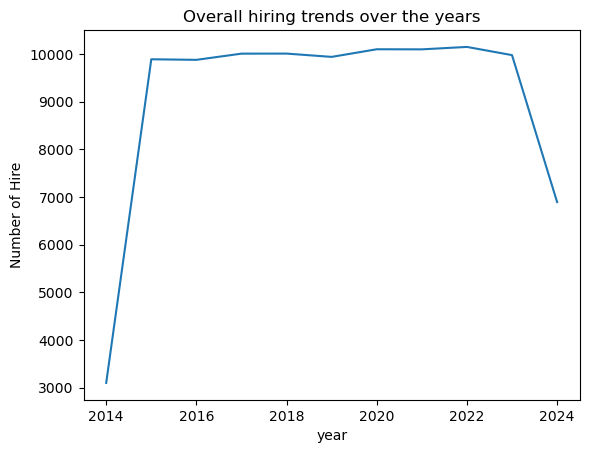

In [21]:
# 4 - What are the overall hiring trends over the years?
df_hire_date = df.groupby(['Hire_Year', 'Hire_Month'])['Job_Title'].value_counts().reset_index()
df_hire_year_sum = df_hire_date.groupby(['Hire_Year'])['count'].sum().reset_index()

plt.plot(df_hire_year_sum['Hire_Year'], df_hire_year_sum['count'])
plt.ylabel('Number of Hire')
plt.title('Overall hiring trends over the years')
plt.ylabel('Number of Hire')
plt.xlabel('year')
# start 09.2014 and end 09.2024 

Text(0.5, 0, 'month')

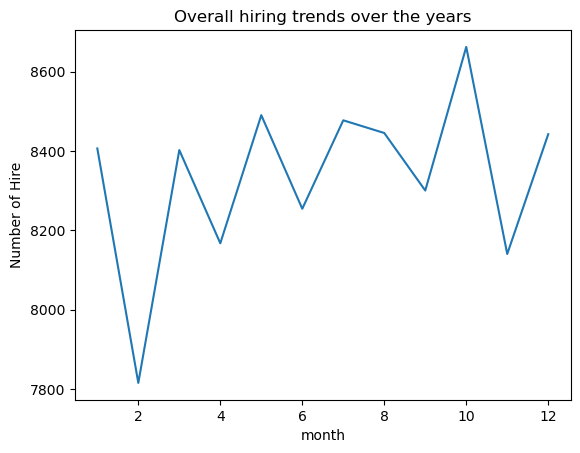

In [22]:
df_hire_month_sum = df_hire_date.groupby(['Hire_Month'])['count'].sum().reset_index()

plt.plot(df_hire_month_sum['Hire_Month'], df_hire_month_sum['count'])
plt.title('Overall hiring trends over the years')
plt.ylabel('Number of Hire')
plt.xlabel('month')


Text(0, 0.5, '')

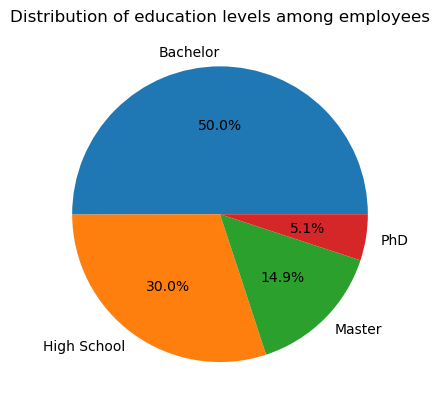

In [10]:
# 5 - What is the distribution of education levels among employees?
df_edu = df['Education_Level'].value_counts().to_frame()

plt.pie(df_edu['count'], labels=df_edu.index, autopct='%1.1f%%')

plt.title('Distribution of education levels among employees')
plt.xlabel('')
plt.ylabel('')


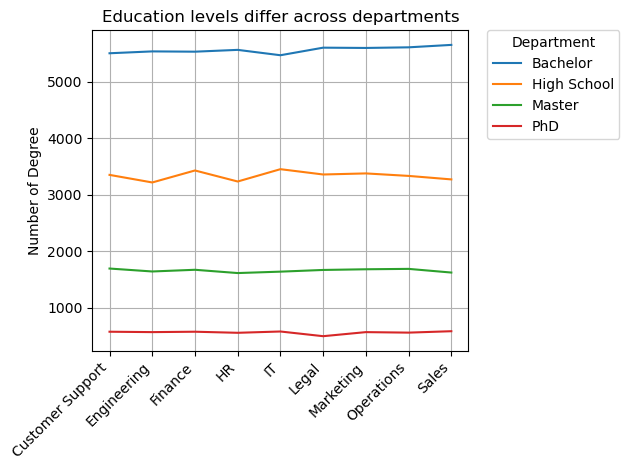

In [11]:
# 6 - How do education levels differ across departments?
df_edu_dep = df.groupby('Department')['Education_Level'].value_counts().reset_index()
df_edu_dep_pivot = df_edu_dep.pivot_table(index='Department', columns='Education_Level', values='count')
                                          
line_plot = df_edu_dep_pivot.iloc[:, :4].plot(kind='line')  # Adding markers for better visibility

plt.title('Education levels differ across departments')
plt.ylabel('Number of Degree')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.grid()
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()


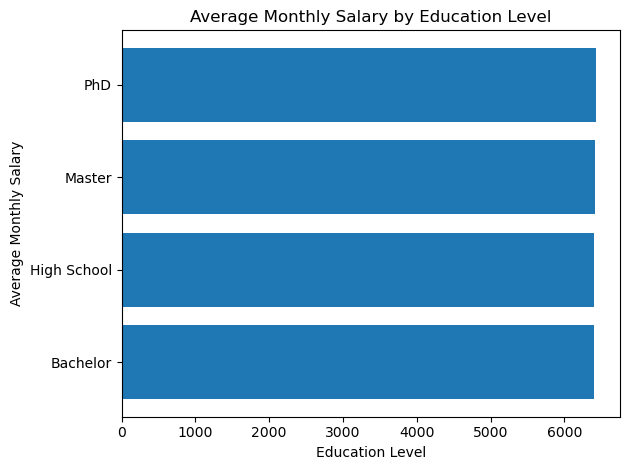

In [12]:
# 7 - Is there a relation between education level and salary?

df_edu_sal = df.groupby('Education_Level')['Monthly_Salary'].mean().reset_index(name='mean_salary')


plt.barh(df_edu_sal['Education_Level'], df_edu_sal['mean_salary'])


plt.title('Average Monthly Salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Monthly Salary')

plt.tight_layout()  
plt.show()

In [13]:
# 8 - Which department has the highest average work hours and number of projects handled?
# Is there a relation between work hours, number of projects handled, and overtime hours?

df.groupby('Department')[['Work_Hours_Per_Week','Projects_Handled']].mean().sort_values(by='Projects_Handled')

,Work_Hours_Per_Week,Projects_Handled
Department,,
HR,44.929106,24.200912
Legal,45.012772,24.212808
Operations,44.968339,24.295144
Finance,44.893661,24.409375
Engineering,45.074297,24.421504
Customer Support,44.906621,24.428661
IT,44.929476,24.538945
Marketing,44.887571,24.661020
Sales,45.013037,24.707427


In [14]:
# 9 - Is there a relation between remote work and the number of projects handled?
df.groupby('Remote_Work_Frequency')['Projects_Handled'].mean().to_frame()

,Projects_Handled
Remote_Work_Frequency,
0,24.494732
25,24.412800
50,24.248655
75,24.543895
100,24.452791


In [15]:
# 10 - Is there a relation between the number of projects handled and promotions received?
df.groupby('Promotions')['Projects_Handled'].sum().to_frame()

,Projects_Handled
Promotions,
0,812787
1,820994
2,809336


In [16]:
# 11 - How does employee satisfaction vary across gender and departments?
df.groupby('Gender')['Employee_Satisfaction_Score'].mean().to_frame()

,Employee_Satisfaction_Score
Gender,
Female,3.004598
Male,2.994508
Other,2.987893


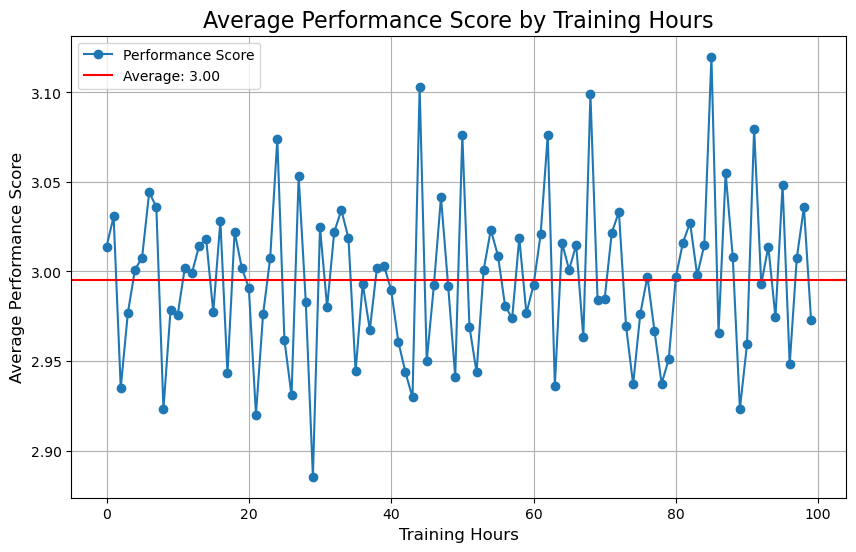

In [17]:
# 12 - Is there a relation between training hours, performance scores, and promotions?

df_tra_per = df.groupby('Training_Hours')['Performance_Score'].mean().reset_index()

avg_perf_score = df['Performance_Score'].mean() 

plt.figure(figsize=(10, 6))
plt.plot(df_tra_per['Training_Hours'], df_tra_per['Performance_Score'], marker='o', label='Performance Score')

plt.axhline(y=avg_perf_score, color='r', label=f'Average: {avg_perf_score:.2f}')

plt.title('Average Performance Score by Training Hours', fontsize=16)
plt.xlabel('Training Hours', fontsize=12)
plt.ylabel('Average Performance Score', fontsize=12)
plt.legend()
plt.grid(True)

plt.show()

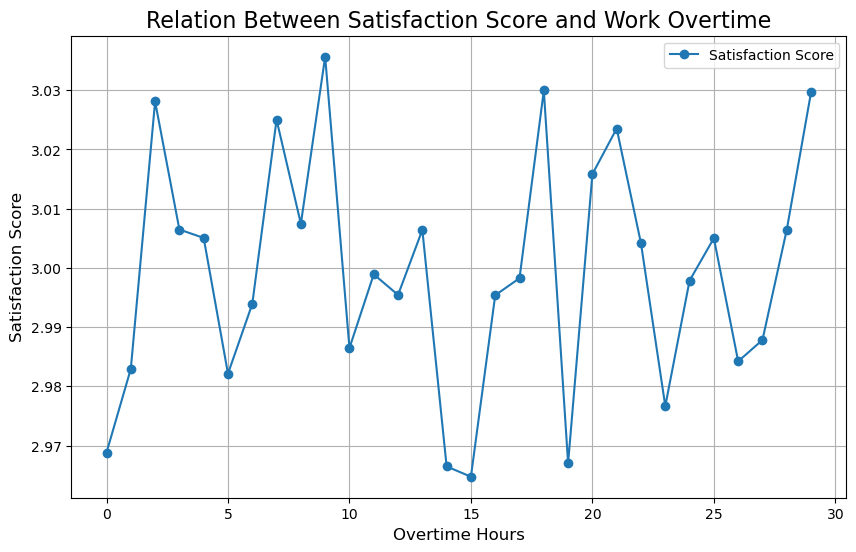

In [18]:
# 13 - Is there a lower satisfaction score among employees who work more overtime?

df_sat_overt = df.groupby('Overtime_Hours')['Employee_Satisfaction_Score'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(df_sat_overt['Overtime_Hours'], df_sat_overt['Employee_Satisfaction_Score'], marker='o', label='Satisfaction Score')

plt.title('Relation Between Satisfaction Score and Work Overtime', fontsize=16)
plt.xlabel('Overtime Hours', fontsize=12)
plt.ylabel('Satisfaction Score', fontsize=12)
plt.legend()
plt.grid(True)

plt.show()

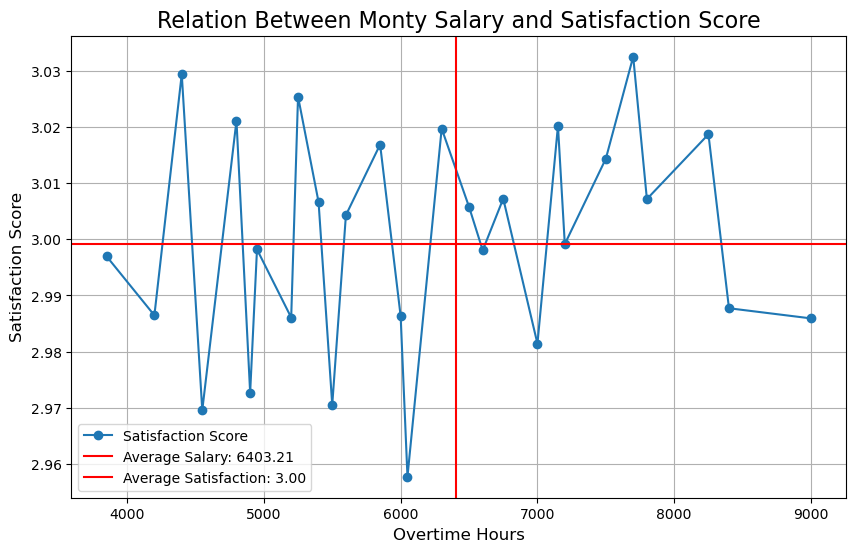

In [23]:
# 14 - Is there a lower satisfaction score among monthly salary?

df_sat_overt = df.groupby('Monthly_Salary')['Employee_Satisfaction_Score'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(df_sat_overt['Monthly_Salary'], df_sat_overt['Employee_Satisfaction_Score'], marker='o', label='Satisfaction Score')


avg_salary = df['Monthly_Salary'].mean() 
plt.axvline(x=avg_salary, color='r', label=f'Average Salary: {avg_salary:.2f}')



avg_sat_sco = df['Employee_Satisfaction_Score'].mean() 
plt.axhline(y=avg_sat_sco, color='r', label=f'Average Satisfaction: {avg_sat_sco:.2f}')


plt.title('Relation Between Monty Salary and Satisfaction Score', fontsize=16)
plt.xlabel('Overtime Hours', fontsize=12)
plt.ylabel('Satisfaction Score', fontsize=12)
plt.legend()
plt.grid(True)

plt.show()